**Подключение библиотек**

In [ ]:
import ast
import torch
import random
from random import randint
import numpy as np
import matplotlib.pyplot as plt

**Загрузка текстового файла (26 букв английского алфавита 5х7)**

In [ ]:
text = open('alphabet.txt', 'r')

# Удаление пустых строк и объединение в один большой массив
data = np.array([ast.literal_eval(line.strip(',\n')) for line in text if line.strip()])

# Преобразование элементов массива из int в float32
data = data.astype(np.float32)

# Преобразование maccива в размер 26x35 (где 26 - количество букв, 35 - букб завернутых в одну строку)
data = data.reshape(26, 35)

**Ввод переменных**

In [ ]:
# Номер варианта
Nv = 2
# Количество образов
Np = 10

**Подготовка данных**

**Идеальные обучающие данные с файла**

In [ ]:
# Входы для № букв, om С до L
inp = torch.from_numpy(data[Nv: Nv + Np, :])
# Эталонные входы, единичная матрица размера Np
out = torch.from_numpy(np.eye(Np))

**Зашумленные обучающие данные с файла**

In [ ]:
def noisy_inp():
  random.seed(1)
  noise_rate = 0.1

  text_for_noise = open('alphabet.txt', 'r')

  noisy_data = np.array([ast.literal_eval(line.strip(',\n')) for line in text_for_noise if line.strip()])

  total_pixels = len(noisy_data) * len(noisy_data[0])

  noise_pixels = round(total_pixels * noise_rate)

  rand_row = []
  rand_col = []

  for i in range(noise_pixels):

    rand_row.append(randint(0, len(noisy_data) - 1))
    rand_col.append(randint(0, len(noisy_data[0]) - 1))

    if noisy_data[rand_row[-1]][rand_col[-1]] == 1:
      noisy_data[rand_row[-1]][rand_col[-1]] -= 1

    else:
      noisy_data[rand_row[-1]][rand_col[-1]] += 1

  noisy_data = noisy_data.astype(np.float32)
  noisy_data = noisy_data.reshape(26, 35)

  noisy_input = torch.from_numpy(noisy_data[Nv: Nv + Np, :])

  return noisy_input

**Создание нейронной сети**

In [ ]:
class Perceptron(torch.nn.Module):

  def __init__(self, hidden_neurons, input_dim = 35, output_dim = Np):
    super(Perceptron, self).__init__()

    self.layers = torch.nn.Sequential()

    self.layers.add_module('layer 1', torch.nn.Linear(input_dim, hidden_neurons))

    self.layers.add_module('activation 1', torch.nn.ReLU())

    self.layers.add_module('dropout 1', torch.nn.Dropout(p = 0.1))

    self. layers.add_module('layer 2', torch.nn.Linear(hidden_neurons, hidden_neurons))

    self.layers.add_module('activation 2', torch.nn.Sigmoid())

    self.layers.add_module('layer 3', torch.nn.Linear(hidden_neurons, output_dim))

  def forward(self, train_data):
    return self.layers(train_data)

model = Perceptron(30)
model

Perceptron(
  (layers): Sequential(
    (layer 1): Linear(in_features=35, out_features=30, bias=True)
    (activation 1): ReLU()
    (dropout 1): Dropout(p=0.1, inplace=False)
    (layer 2): Linear(in_features=30, out_features=30, bias=True)
    (activation 2): Sigmoid()
    (layer 3): Linear(in_features=30, out_features=10, bias=True)
  )
)

**Обучение нейронной сети**

**Идеальная обучающая выборка**

In [ ]:
def training(model_name, input_data, output_data, epochs):
  # Оптимайзер
  optimizer = torch.optim.Adam(model_name.parameters(), lr = 0.01)

  # loss-функция
  def loss(pred, target):
    ans = (pred - target) ** 2
    return ans.mean()

  # Обучение
  print("Обучение запущено!")
  for epoch in range(epochs):

    optimizer.zero_grad()
    y_pred = model_name. forward(input_data)
    loss_val = loss(y_pred, output_data)
    loss_val.backward()
    optimizer.step()

    if epoch % 10 == 0:
      y_pred = model_name.forward(input_data)
      print((((y_pred - output_data) ** 2).mean()) ** 0.5)
  print("Обучение Завершено!\n")

In [ ]:
training(model, inp, out, 200)

Обучение запущено!
tensor(0.3282, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.2600, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.2124, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.1788, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.1583, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.1620, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.1361, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.1370, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.0884, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.1095, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.0895, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.0734, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.1146, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.0825, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.0657, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.0524, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.1129, dtype=

In [ ]:
training(model, noisy_inp(), out, 200)

Обучение запущено!
tensor(0.3555, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.2766, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.2282, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.1813, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.1400, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.1119, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.1303, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.0769, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.0885, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.0598, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.0695, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.0637, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.0546, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.0665, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.0562, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.0614, dtype=torch.float64, grad_fn=<PowBackward0>)
tensor(0.0930, dtype=

**Тестирование нейронной сети**

In [ ]:
def testing(model_name, input_data):
  test_out = model_name.forward(input_data)
  test_out = test_out.detach().numpy()

  return test_out

**Нейронная сеть на идеальный данных**

**Тестирование идеальных данных**

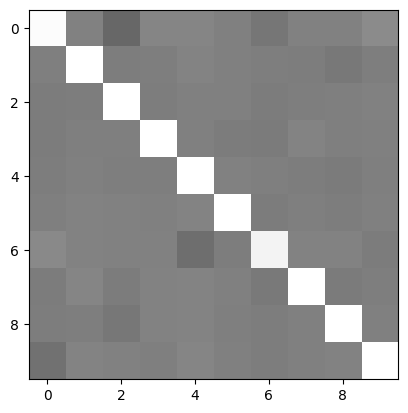

In [ ]:
data_test1 = testing(model, inp)

plt.clf
plt.imshow(data_test1, cmap='gray', clim = (-1, 1))
plt.show()

**Тестирование зашумленных данных**

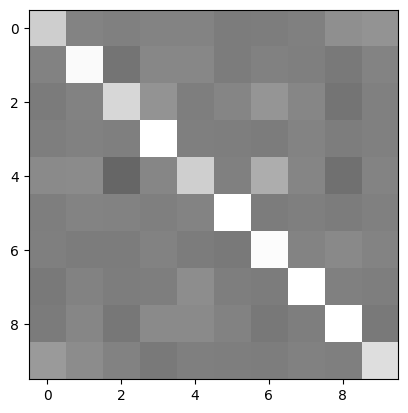

In [ ]:
noisy_data_test1 = testing(model, noisy_inp())

plt.clf
plt.imshow(noisy_data_test1, cmap='gray', clim = (-1, 1))
plt.show()

**Нейронная сеть на зашумленных данных**

**Тестирование идеальных данных**

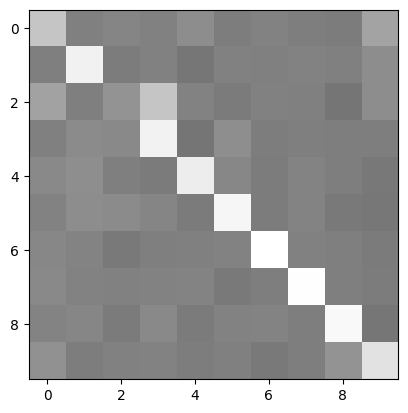

In [ ]:
data_test1 = testing(model, inp)

plt.clf
plt.imshow(data_test1, cmap = 'gray', clim = (-1, 1))
plt.show()

**Тестирование зашумленных данных**

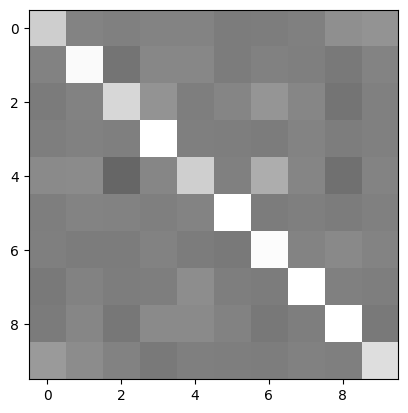

In [ ]:
noisy_data_testl = testing(model, noisy_inp())

plt.clf
plt.imshow(noisy_data_test1, cmap='gray', clim=(-1, 1))
plt.show()